   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy on Original Dataset: 0.9673
Accuracy on PCA + t-SNE Dataset: 0.8074
Accuracy on PCA + UMAP Dataset: 0.9583


InvalidIndexError: (slice(None, None, None), 0)

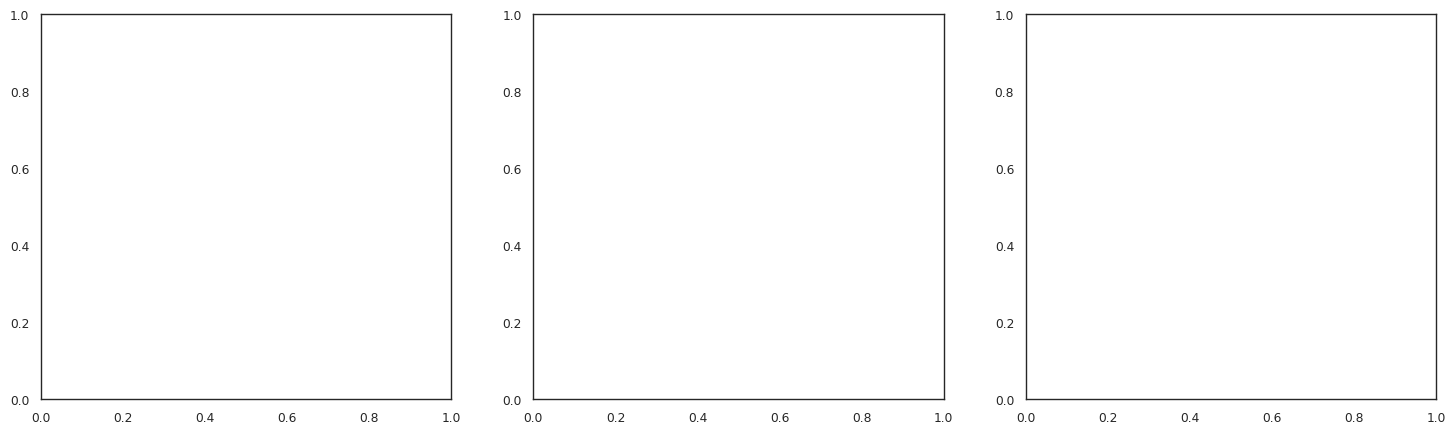

In [1]:
!pip install umap-learn
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality Reduction
# PCA
pca = PCA(n_components=50, random_state=42)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# t-SNE on PCA
tsne = TSNE(n_components=2, random_state=42)
tsne_train = tsne.fit_transform(pca_train)
tsne_test = tsne.fit_transform(pca_test)

# UMAP on PCA
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_train = umap_reducer.fit_transform(pca_train)
umap_test = umap_reducer.transform(pca_test)

# Combine PCA+t-SNE and PCA+UMAP datasets
combined_tsne_train = tsne_train
combined_tsne_test = tsne_test
combined_umap_train = umap_train
combined_umap_test = umap_test

# Model Training and Accuracy
# Model 1: PCA + t-SNE
model_tsne = RandomForestClassifier(random_state=42)
model_tsne.fit(combined_tsne_train, y_train)
tsne_pred = model_tsne.predict(combined_tsne_test)
accuracy_tsne = accuracy_score(y_test, tsne_pred)

# Model 2: PCA + UMAP
model_umap = RandomForestClassifier(random_state=42)
model_umap.fit(combined_umap_train, y_train)
umap_pred = model_umap.predict(combined_umap_test)
accuracy_umap = accuracy_score(y_test, umap_pred)

# Original Dataset (non-reduced)
model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train, y_train)
original_pred = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, original_pred)

# Print Accuracies
print(f"Accuracy on Original Dataset: {accuracy_original:.4f}")
print(f"Accuracy on PCA + t-SNE Dataset: {accuracy_tsne:.4f}")
print(f"Accuracy on PCA + UMAP Dataset: {accuracy_umap:.4f}")




/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:11:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:11:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/pytho

Accuracy on Original Dataset: 0.9781
Accuracy on PCA + t-SNE Dataset: 0.8141
Accuracy on PCA + UMAP Dataset: 0.9595


InvalidIndexError: (slice(None, None, None), 0)

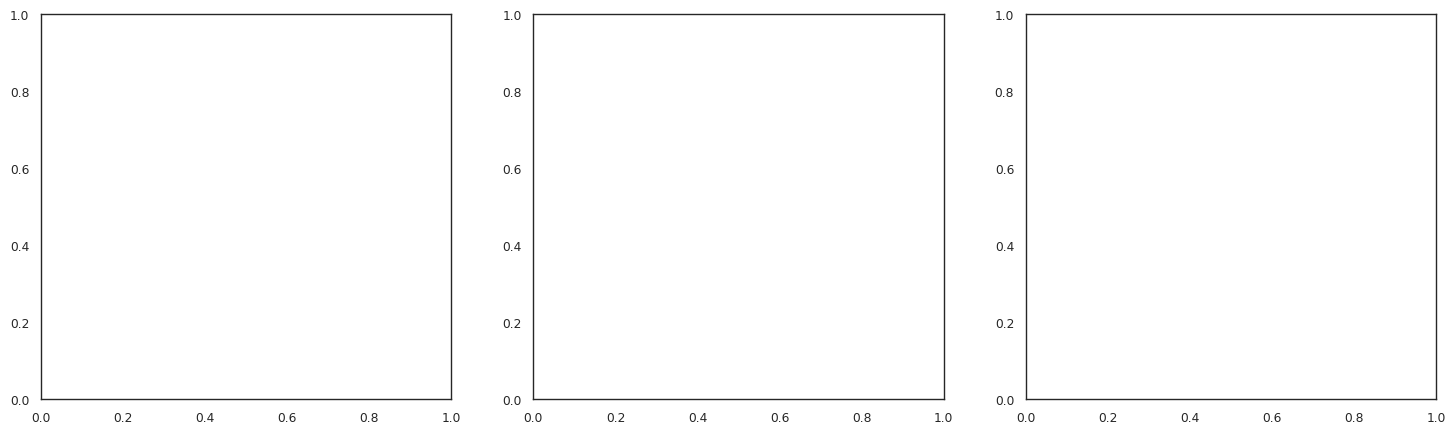

In [2]:
!pip install umap-learn xgboost
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dimensionality Reduction
# PCA
pca = PCA(n_components=50, random_state=42)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

# t-SNE on PCA
tsne = TSNE(n_components=2, random_state=42)
tsne_train = tsne.fit_transform(pca_train)
tsne_test = tsne.fit_transform(pca_test)

# UMAP on PCA
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_train = umap_reducer.fit_transform(pca_train)
umap_test = umap_reducer.transform(pca_test)

# Model Training and Accuracy
# Model 1: PCA + t-SNE
model_tsne = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model_tsne.fit(tsne_train, y_train)
tsne_pred = model_tsne.predict(tsne_test)
accuracy_tsne = accuracy_score(y_test, tsne_pred)

# Model 2: PCA + UMAP
model_umap = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model_umap.fit(umap_train, y_train)
umap_pred = model_umap.predict(umap_test)
accuracy_umap = accuracy_score(y_test, umap_pred)

# Original Dataset (non-reduced)
model_original = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model_original.fit(X_train, y_train)
original_pred = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, original_pred)

# Print Accuracies
print(f"Accuracy on Original Dataset: {accuracy_original:.4f}")
print(f"Accuracy on PCA + t-SNE Dataset: {accuracy_tsne:.4f}")
print(f"Accuracy on PCA + UMAP Dataset: {accuracy_umap:.4f}")


